In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
import glob
from sklearn.impute import KNNImputer
import seaborn as sns
from numpy import nan
from datetime import datetime
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import os
import seaborn as sns; sns.set()
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from statistics import mean, stdev
from sklearn.metrics import roc_auc_score
import itertools
import warnings
warnings.filterwarnings('ignore')

In [44]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\RAM KUMAR\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [45]:
path = os.getcwd()
csv_files={}
csv_files = glob.glob(os.path.join(path, "*.csv"))

In [46]:
print(csv_files)

['C:\\Users\\RAM KUMAR\\Desktop\\sem4\\bio medical\\major\\raw_data\\p02_n01_ready.csv', 'C:\\Users\\RAM KUMAR\\Desktop\\sem4\\bio medical\\major\\raw_data\\p02_n02_ready.csv', 'C:\\Users\\RAM KUMAR\\Desktop\\sem4\\bio medical\\major\\raw_data\\p03_n01_ready.csv', 'C:\\Users\\RAM KUMAR\\Desktop\\sem4\\bio medical\\major\\raw_data\\p03_n02_ready.csv', 'C:\\Users\\RAM KUMAR\\Desktop\\sem4\\bio medical\\major\\raw_data\\p04_n01_ready.csv', 'C:\\Users\\RAM KUMAR\\Desktop\\sem4\\bio medical\\major\\raw_data\\p04_n02_ready.csv', 'C:\\Users\\RAM KUMAR\\Desktop\\sem4\\bio medical\\major\\raw_data\\p05_n01_ready.csv', 'C:\\Users\\RAM KUMAR\\Desktop\\sem4\\bio medical\\major\\raw_data\\p05_n02_ready.csv', 'C:\\Users\\RAM KUMAR\\Desktop\\sem4\\bio medical\\major\\raw_data\\p06_n01_ready.csv', 'C:\\Users\\RAM KUMAR\\Desktop\\sem4\\bio medical\\major\\raw_data\\p06_n02_ready.csv', 'C:\\Users\\RAM KUMAR\\Desktop\\sem4\\bio medical\\major\\raw_data\\p07_n01_ready.csv', 'C:\\Users\\RAM KUMAR\\Desktop\

In [47]:
for i in csv_files:
    df = pd.read_csv(i, parse_dates=[0], sep=',\s*')
    df['newcolumn']= df.index // 4 +1
    df1 = df[['timestamp','Apple Watch ENMO','newcolumn']]
    df2 = df1.groupby(by=["newcolumn"]).sum().reset_index()
    df2['activity'] = ""
    df3 = df2
    #x=1
    for i in range(int(len(df3)/5)):
        x=1
        df3['activity'][x] = (0.04 * df3.loc[df3.index[x+1],'Apple Watch ENMO']) + (0.2*df3.loc[df3.index[x+2],'Apple Watch ENMO']) +  (0.04*df3.loc[df3.index[x+3],'Apple Watch ENMO'])+(0.04*df3.loc[df3.index[x+4],'Apple Watch ENMO'])+(0.04*df3.loc[df3.index[x+5],'Apple Watch ENMO'])
        df3['activity'][x+1] = (0.04 * df3.loc[df3.index[x+1],'Apple Watch ENMO']) + (0.2*df3.loc[df3.index[x+2],'Apple Watch ENMO']) +  (0.04*df3.loc[df3.index[x+3],'Apple Watch ENMO'])+(0.04*df3.loc[df3.index[x+4],'Apple Watch ENMO'])+(0.04*df3.loc[df3.index[x+5],'Apple Watch ENMO'])
        df3['activity'][x+2] = (0.04 * df3.loc[df3.index[x+1],'Apple Watch ENMO']) + (0.2*df3.loc[df3.index[x+2],'Apple Watch ENMO']) +  (0.04*df3.loc[df3.index[x+3],'Apple Watch ENMO'])+(0.04*df3.loc[df3.index[x+4],'Apple Watch ENMO'])+(0.04*df3.loc[df3.index[x+5],'Apple Watch ENMO'])
        df3['activity'][x+3] = (0.04 * df3.loc[df3.index[x+1],'Apple Watch ENMO']) + (0.2*df3.loc[df3.index[x+2],'Apple Watch ENMO']) +  (0.04*df3.loc[df3.index[x+3],'Apple Watch ENMO'])+(0.04*df3.loc[df3.index[x+4],'Apple Watch ENMO'])+(0.04*df3.loc[df3.index[x+5],'Apple Watch ENMO'])
        df3['activity'][x+4] = (0.04 * df3.loc[df3.index[x+1],'Apple Watch ENMO']) + (0.2*df3.loc[df3.index[x+2],'Apple Watch ENMO']) +  (0.04*df3.loc[df3.index[x+3],'Apple Watch ENMO'])+(0.04*df3.loc[df3.index[x+4],'Apple Watch ENMO'])+(0.04*df3.loc[df3.index[x+5],'Apple Watch ENMO'])
        x+=5
    df3['activity'] = pd.to_numeric(df3['activity'], errors='coerce')
    df3['sleepwake'] = np.where(df3['activity']>= 0.0608, 'Awake', 'Sleep')
    df5 = df3
    df5.loc[df5.index[(((len(df5))-len(df5)%5)):(len(df5)+1)], 'sleepwake'] = 'Awake'
    knn_imp = KNNImputer(n_neighbors=3)
    df5[['activity']] = knn_imp.fit_transform(df5[['activity']])
    df5.to_csv('test1.csv',mode='a', header = True)
    
    

In [48]:
#header_list = ['newcolumn','Apple Watch ENMO','activity','sleepwake']

#df6 = pd.read_csv('test1.csv')#, names=header_list)

In [49]:
print(df5.to_string())

     newcolumn  Apple Watch ENMO  activity sleepwake
0            1          0.303318   0.08617     Sleep
1            2          0.267121   0.08617     Awake
2            3          0.114505   0.08617     Awake
3            4          0.107954   0.08617     Awake
4            5          0.233124   0.08617     Awake
5            6          0.621556   0.08617     Awake
6            7          0.645293   0.08617     Sleep
7            8          0.423642   0.08617     Sleep
8            9          0.079875   0.08617     Sleep
9           10          0.006676   0.08617     Sleep
10          11          0.082107   0.08617     Sleep
11          12          0.011197   0.08617     Sleep
12          13          0.095245   0.08617     Sleep
13          14          0.097578   0.08617     Sleep
14          15          0.012275   0.08617     Sleep
15          16          0.012035   0.08617     Sleep
16          17          0.009425   0.08617     Sleep
17          18          0.011694   0.08617    

['Sleep' 'Awake' 'Sleep' 'Awake' 'Sleep']
Train accuracy: 0.9661016949152542
Test accuracy: 0.9605263157894737
              precision    recall  f1-score   support

       Awake       0.50      0.67      0.57         3
       Sleep       0.99      0.97      0.98        73

    accuracy                           0.96        76
   macro avg       0.74      0.82      0.78        76
weighted avg       0.97      0.96      0.96        76



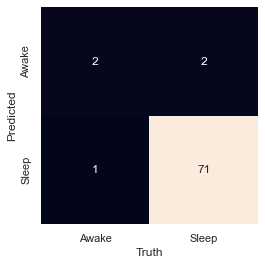

In [50]:


train, test = train_test_split(df5, test_size= 0.3, random_state= 1)



xtrain = train.drop('sleepwake', axis=1)
ytrain = train.loc[:, 'sleepwake']


xtest = test.drop('sleepwake', axis=1)
ytest = test.loc[:, 'sleepwake']


model = GaussianNB()


model.fit(xtrain, ytrain)

# # Predict Output 
pred = model.predict(xtest)
print(pred[:5])

# # Plot Confusion Matrix
mat = confusion_matrix(pred, ytest)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
             xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

print("Train accuracy:", model.score(xtrain, ytrain))

print("Test accuracy:", model.score(xtest, ytest))
print(classification_report(ytest, pred))

[18:54:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train accuracy 0.9887005649717514
Test accuracy 0.9605263157894737
              precision    recall  f1-score   support

       Awake       0.50      0.33      0.40         3
       Sleep       0.97      0.99      0.98        73

    accuracy                           0.96        76
   macro avg       0.74      0.66      0.69        76
weighted avg       0.95      0.96      0.96        76



Text(89.18, 0.5, 'Predicted')

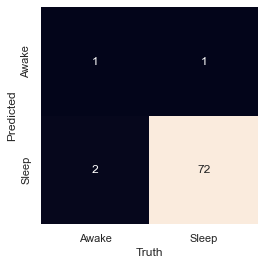

In [51]:
from xgboost import XGBClassifier
model4 = XGBClassifier()

model4.fit(xtrain, ytrain)
y_pred = model4.predict(xtest)

print("Train accuracy", model4.score(xtrain,ytrain))
print("Test accuracy", model4.score(xtest,ytest))

print(classification_report(ytest,y_pred))
# # Plot Confusion Matrix
mat = confusion_matrix(y_pred, ytest)
names = np.unique(y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
             xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

Train accuracy 0.9717514124293786
Test accuracy 0.9473684210526315
              precision    recall  f1-score   support

       Awake       0.00      0.00      0.00         3
       Sleep       0.96      0.99      0.97        73

    accuracy                           0.95        76
   macro avg       0.48      0.49      0.49        76
weighted avg       0.92      0.95      0.93        76



Text(89.18, 0.5, 'Predicted')

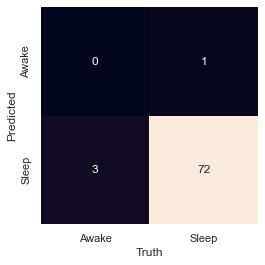

In [52]:
from sklearn.neural_network import MLPClassifier

model3 = MLPClassifier(random_state= 1)

model3.fit(xtrain, ytrain)

print("Train accuracy", model3.score(xtrain,ytrain))
print("Test accuracy", model3.score(xtest,ytest))

prediction = model3.predict(xtest)
print(classification_report(ytest,prediction))

# # Plot Confusion Matrix
mat = confusion_matrix(prediction, ytest)
names = np.unique(prediction)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
             xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

Train accuracy 1.0
Test accuracy 0.9605263157894737
              precision    recall  f1-score   support

       Awake       0.50      0.33      0.40         3
       Sleep       0.97      0.99      0.98        73

    accuracy                           0.96        76
   macro avg       0.74      0.66      0.69        76
weighted avg       0.95      0.96      0.96        76



Text(89.18, 0.5, 'Predicted')

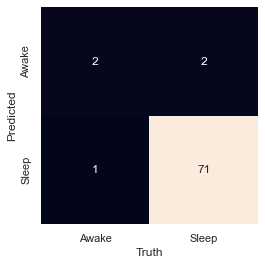

In [53]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model2 = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model2.fit(xtrain, ytrain)

print("Train accuracy", model2.score(xtrain,ytrain))
print("Test accuracy", model2.score(xtest,ytest))

prediction = model2.predict(xtest)
print(classification_report(ytest,prediction))

rf_predictions = model.predict(xtest)
# Probabilities for each class
rf_probs = model.predict_proba(xtest)[:, 1]

from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(ytest, rf_probs)
# # Plot Confusion Matrix
mat = confusion_matrix(rf_predictions, ytest)
names = np.unique(rf_predictions)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
             xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [54]:
skf = StratifiedKFold(n_splits=10)
target = df5.loc[:,'sleepwake']


In [55]:
model = [GaussianNB(), XGBClassifier(), MLPClassifier(random_state= 1),RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')]
for i in model:
    print(i)

GaussianNB()
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)
MLPClassifier(random_state=1)
RandomForestClassifier(max_features='sqrt')


In [56]:
model = [GaussianNB(), XGBClassifier(), MLPClassifier(random_state= 1),RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')]

class_names = ['Awake','Sleep']


for i in model:
    model_accuracy_list = []
    predictions = np.array([])
    predicted_targets = np.array([])
    actual_targets = np.array([])
    min_predicted_targets = np.array([])
    min_actual_targets = np.array([])
    def train_model(train, test, fold_no,predicted_targets,actual_targets,predictions,ytest):
        acc_score = 0
        xtrain = train.drop('sleepwake', axis=1)
        ytrain = train.loc[:, 'sleepwake']
        xtest = test.drop('sleepwake', axis=1)
        ytest = test.loc[:, 'sleepwake']
        i.fit(xtrain,ytrain)
        predictions = i.predict(xtest)
        #print('Fold',str(fold_no),'Accuracy:',accuracy_score(ytest,predictions))
        #model_accuracy_list.append(accuracy_score(ytest,predictions))
        acc_score = accuracy_score(ytest,predictions)
        
        #predicted_targets = np.append(predicted_targets, predictions)
        #actual_targets = np.append(actual_targets, ytest)   
        #print(actual_targets)
        return acc_score,predicted_targets, actual_targets,predictions,ytest
   
    
    
    # Print the output.
    
    
    fold_no = 1    
    for train_index, test_index in skf.split(df5, target):
        predictions = np.array([])
        
        #predicted_targets = np.array([])
        #actual_targets = np.array([])
        train = df5.loc[train_index,:]
        test = df5.loc[test_index,:]
        acc_score = train_model(train,test,fold_no,predicted_targets,actual_targets,predictions,ytest)
        #plot_confusion_matrix(acc_score[3], acc_score[4])
        
        
        model_accuracy_list.append(acc_score[0])
        predicted_targets=np.append(predicted_targets,acc_score[3])
        
        actual_targets=np.append(actual_targets,acc_score[4])
        
        
        fold_no += 1
    

    print('For the model:', i)
    print('List of possible accuracy:', model_accuracy_list)
    print('\nMaximum Accuracy That can be obtained from this model is:', max(model_accuracy_list)*100, '%')
    minval = min(model_accuracy_list)
    index = model_accuracy_list.index(minval)
    print('\nMinimum Accuracy:', minval, '%','when i value is = ',index)
    print('\nOverall Accuracy:', mean(model_accuracy_list))
    print('\nStandard Deviation is:', stdev(model_accuracy_list))
    #plot_confusion_matrix(predicted_targets, actual_targets)
    
  
    cm1 = confusion_matrix(df5['sleepwake'],predicted_targets)
    print('Confusion Matrix : \n', cm1)

    total1=sum(sum(cm1))
    #####from confusion matrix calculate accuracy
   
    sensitivity1 = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    print('Sensitivity : ', sensitivity1 )

    specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    print('Specificity : ', specificity1)
    
    
    
    

    
    

For the model: GaussianNB()
List of possible accuracy: [0.8461538461538461, 0.9615384615384616, 0.9615384615384616, 1.0, 1.0, 0.96, 1.0, 0.96, 1.0, 0.8]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 0.8 % when i value is =  9

Overall Accuracy: 0.948923076923077

Standard Deviation is: 0.0697126628261817
Confusion Matrix : 
 [[  4   4]
 [  9 236]]
Sensitivity :  0.963265306122449
Specificity :  0.5
[18:54:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:54:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicit